# **K-Means**

K Means bir **unsupervised learning** algoritmasıdır.

Unsupervised learning'de **labellar yoktur**. Amaç, verileri yorumlayarak ortak noktaları bulmak ve verilerin içinde bir yapı bulmaktır.

Modelin her bir veri noktasını nasıl kategorize edeceğine dair hiçbir ipucu yoktur ve bunu yapmak için kendi kurallarını çıkarır.

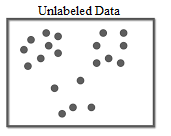



K means'te dataların labelları belli değildir(kedi-köpek, 0-1 gibi bilgi verilmez).

Benzer özellik gösteren veriler gruplanır(**clustering**).

K-means algoritmasının çalışma mantığında,

Başlangıçta bir **k değeri** seçilir. Bu k değeri verinin kaç gruba ayrılacağının bilgisidir.

Veri kaç gruba ayrılacaksa, veriden random bir şekilde o kadar data point seçilir. Mesela veri iki gruba ayrılacaksa iki data point seçilir.

Seçilen bu data point'lere **centroid** denir.

Data'daki her bir data point en yakınındaki centroid'e atanır. Bunu hesaplamak için **euclidean distance** hesaplaması kullanılır.

Gruplar için tekrardan yeni bir centroid seçilir ve veriler en yakınlarındaki centroid'e atanır. 

Eğer yapılan kümelemede bir değişiklik olmazsa burada durulur ve model hazır hale gelir. Eğer grupların kümeleri değiştiyse bu adım tekrarlanır.

K means'te aynı kümelerdeki verilerde benzerlik fazla, farklı kümelerde benzerlik azdır.

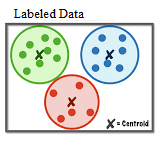

En uygun k değerini belirlemek için **WCSS** metriği kullanılır.

**WCSS** -> **within cluster sums of squares**

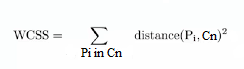

**Pi -> point**

**Cn-> Cluster**

**n -> küme sayısı(k değeri)**

Her bir küme için o kümedeki data pointlerin centroidlere olan uzaklıklarının karelerinin toplamıdır.

WCSS değerinin az olması amaçlanmaktadır.

Datadaki point kadar küme oluşturulursa, her bir pointin kendine olan uzaklığı 0 olduğundan WCSS değeri 0 bulunur. 

Ancak bu durumda her point kendi başına bir küme olacağından, overfitting oluşur.

**Elbow** grafiğinde en uygun k değerinin seçilmesi için çizilir. Grafikte bir dirsek şekli oluşur. Bu dirsek noktası WCSS ve k değeri arasında azalmanın fazla olduğu yerdir. k değeri ve wcss arasında bir trade off olduğundan dirsek noktası seçilir.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Numpy kütüphanesi kullanılarak bir dataset hazırlanmıştır.

3 farklı class'tan oluşan (k değeri 3 olacak şekilde) bir dataset oluşturulur.

In [ ]:
# class1
x1 = np.random.normal(25,5,1000) #25 ortalamaya, 5 sigmaya sahip 1000 değer üretir.
y1 = np.random.normal(25,5,1000) #datanın %66'sı (25+5)30 ile (25-5)20 değerleri arasında olur.
                                 #bu dağılım gaussian(normal) dağılımdır.
# class2
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

# class3
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

In [ ]:
x = np.concatenate((x1,x2,x3),axis = 0) #axis=0 sütunu birleştirilir.
y = np.concatenate((y1,y2,y3),axis = 0) #x1, x2, x3 featureları x ekseninde, y1,y2,y3 featureları y ekseninde birleştirilir.

In [ ]:
dictionary = {"x":x,"y":y}       #dictionary oluşturulur.

In [ ]:
data = pd.DataFrame(dictionary)  #oluşturulan dictionary dataframe'e dönüştürülür.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3000 non-null   float64
 1   y       3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


Dataframe'de float türünde 3000 sample vardır.

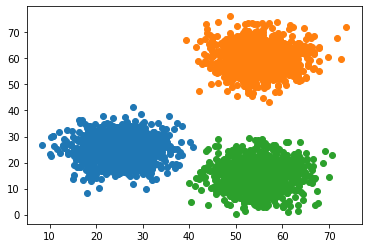

In [ ]:
plt.scatter(x1,y1)               
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()

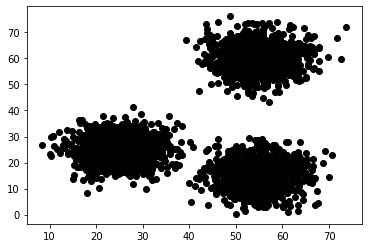

In [ ]:
#k-means algoritması bu şekilde görür.
plt.scatter(x1,y1,color = "black")
plt.scatter(x2,y2,color = "black")
plt.scatter(x3,y3,color = "black")
plt.show()

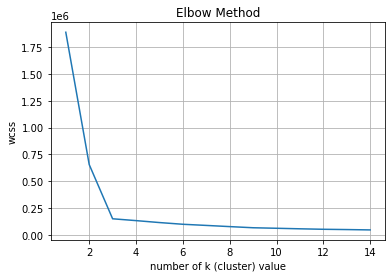

In [ ]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k) #for döngüsünün içerisinde sırayla k değerleri denenir.
    kmeans.fit(data)              #data k değerleri göre fit edilir/model oluşturulur.
    wcss.append(kmeans.inertia_)  #her bir k değeri için wcss değeri bulunur.
    
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.title("Elbow Method")
plt.grid()
plt.show()

k değeri 1 olduğunda wcss değeri çok yüksektir. Çünkü bir kümeleme yapılmamıştır.

Bu methoda göre k değerinin 3 olduğunda bir dirsek şekli oluşmuştur.

Bu durumda k değeri 3 seçilmesi optimal cluster sayısıdır.

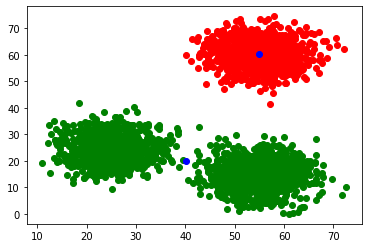

In [ ]:
#k=2 için model

kmeans2 = KMeans(n_clusters=2)
clusters = kmeans2.fit_predict(data) #fit_predict methodu ile data fit edilip, fit edilen datadan 2 cluster oluşturulur.

data["label"] = clusters

plt.scatter(data.x[data.label == 0 ],data.y[data.label == 0],color = "red")   #cluster1
plt.scatter(data.x[data.label == 1 ],data.y[data.label == 1],color = "green") #cluster2
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color = "blue") #centroid
plt.show()


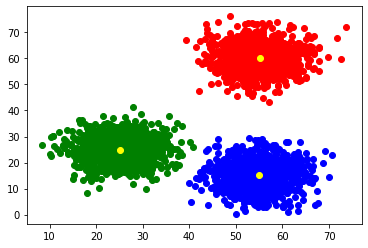

In [ ]:
#k=3 için model

kmeans2 = KMeans(n_clusters=3)
clusters = kmeans2.fit_predict(data)

data["label"] = clusters

plt.scatter(data.x[data.label == 0 ],data.y[data.label == 0],color = "red")   #cluster1
plt.scatter(data.x[data.label == 1 ],data.y[data.label == 1],color = "green") #cluster2
plt.scatter(data.x[data.label == 2 ],data.y[data.label == 2],color = "blue")  #cluster3
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color = "yellow")  #centroid
plt.show()


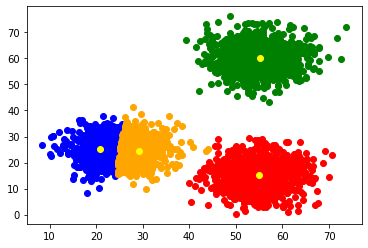

In [ ]:
#k=4 için model

kmeans2 = KMeans(n_clusters=4)
clusters = kmeans2.fit_predict(data)

data["label"] = clusters

plt.scatter(data.x[data.label == 0 ],data.y[data.label == 0],color = "red")    #cluster1
plt.scatter(data.x[data.label == 1 ],data.y[data.label == 1],color = "green")  #cluster2
plt.scatter(data.x[data.label == 2 ],data.y[data.label == 2],color = "blue")   #cluster3
plt.scatter(data.x[data.label == 3 ],data.y[data.label == 3],color = "orange") #cluster4
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color = "yellow") #cemtroid
plt.show()

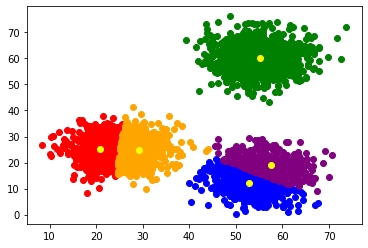

In [ ]:
#k=5 için model

kmeans2 = KMeans(n_clusters=5)
clusters = kmeans2.fit_predict(data)

data["label"] = clusters

plt.scatter(data.x[data.label == 0 ],data.y[data.label == 0],color = "red")    #cluster1
plt.scatter(data.x[data.label == 1 ],data.y[data.label == 1],color = "green")  #cluster2
plt.scatter(data.x[data.label == 2 ],data.y[data.label == 2],color = "blue")   #cluster3
plt.scatter(data.x[data.label == 3 ],data.y[data.label == 3],color = "orange") #cluster4
plt.scatter(data.x[data.label == 4 ],data.y[data.label == 4],color = "purple") #cluster5
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color = "yellow") #centroid
plt.show()